In [14]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [15]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
plz_shape_df = gpd.read_file('/Users/origenolet/Desktop/Ironhack/Week5/Mid-bootcamp-project/data/raw/plz-5stellig.shp.zip')
plz_shape_df.head()

,plz,note,einwohner,qkm,geometry
0,81248,81248 MÃ¼nchen,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39490 48.14780..."
1,60315,60315 Frankfurt am Main (FOUR),0,0.017481,"POLYGON ((8.67254 50.11264, 8.67259 50.11264, ..."
2,24988,24988 Oeversee,3350,36.491463,"POLYGON ((9.36585 54.69994, 9.36683 54.70014, ..."
3,93185,93185 Michelsneukirchen,1786,32.873844,"POLYGON ((12.47666 49.13598, 12.47702 49.13637..."
4,93489,93489 Schorndorf,2622,38.597260,"POLYGON ((12.54904 49.19318, 12.54953 49.19371..."


In [17]:
plz_shape_df = plz_shape_df[["plz", "note", "geometry"]]
plz_shape_df

,plz,note,geometry
0,81248,81248 MÃ¼nchen,"POLYGON ((11.39468 48.14729, 11.39490 48.14780..."
1,60315,60315 Frankfurt am Main (FOUR),"POLYGON ((8.67254 50.11264, 8.67259 50.11264, ..."
2,24988,24988 Oeversee,"POLYGON ((9.36585 54.69994, 9.36683 54.70014, ..."
3,93185,93185 Michelsneukirchen,"POLYGON ((12.47666 49.13598, 12.47702 49.13637..."
4,93489,93489 Schorndorf,"POLYGON ((12.54904 49.19318, 12.54953 49.19371..."
...,...,...,...
8165,63874,63874 Dammbach,"POLYGON ((9.28704 49.86601, 9.28707 49.86608, ..."
8166,63856,63856 Bessenbach,"POLYGON ((9.21845 49.96548, 9.22015 49.96586, ..."
8167,63869,63869 HeigenbrÃ¼cken,"POLYGON ((9.30293 50.04595, 9.30574 50.05000, ..."
8168,75339,75339 HÃ¶fen an der Enz,"POLYGON ((8.55002 48.79175, 8.55007 48.79177, ..."


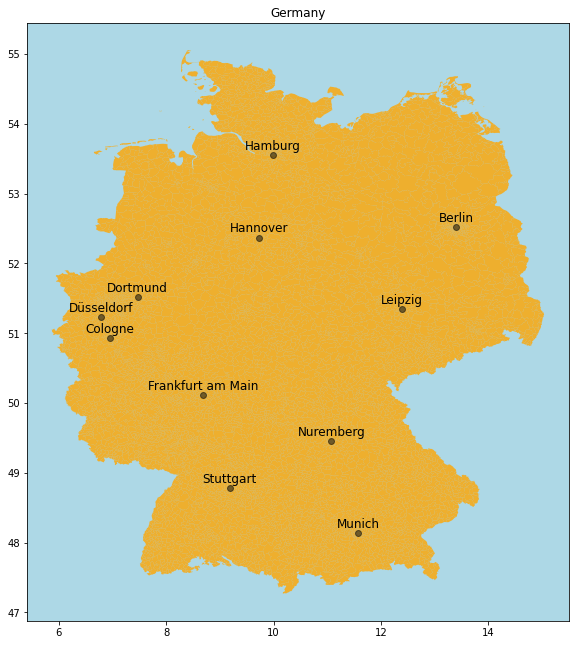

In [18]:
plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [19]:
plz_region_df = pd.read_csv(
    '/Users/origenolet/Desktop/Ironhack/Week5/Mid-bootcamp-project/data/raw/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str})
plz_region_df.drop('osm_id', axis=1, inplace=True)
plz_region_df.head()

,ags,ort,plz,landkreis,bundesland
0,8335001,Aach,78267,Landkreis Konstanz,Baden-Württemberg
1,7235001,Aach,54298,Landkreis Trier-Saarburg,Rheinland-Pfalz
2,5334002,Aachen,52062,Städteregion Aachen,Nordrhein-Westfalen
3,5334002,Aachen,52064,Städteregion Aachen,Nordrhein-Westfalen
4,5334002,Aachen,52066,Städteregion Aachen,Nordrhein-Westfalen


In [20]:
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)
germany_df.drop(['note'], axis=1, inplace=True)
germany_df.head()

,plz,geometry,ags,ort,landkreis,bundesland
0,81248,"POLYGON ((11.39468 48.14729, 11.39490 48.14780...",9162000,München,NaN,Bayern
1,60315,"POLYGON ((8.67254 50.11264, 8.67259 50.11264, ...",6412000,Frankfurt am Main,NaN,Hessen
2,24988,"POLYGON ((9.36585 54.69994, 9.36683 54.70014, ...",1059184,Oeversee,Kreis Schleswig-Flensburg,Schleswig-Holstein
3,93185,"POLYGON ((12.47666 49.13598, 12.47702 49.13637...",9372142,Michelsneukirchen,Landkreis Cham,Bayern
4,93489,"POLYGON ((12.54904 49.19318, 12.54953 49.19371...",9372158,Schorndorf,Landkreis Cham,Bayern


In [21]:
berlin_df = germany_df.query('ort == "Berlin"')

In [22]:
berlin_neighbourhoods_df = gpd.read_file('/Users/origenolet/Desktop/Ironhack/Week5/Mid-bootcamp-project/data/raw/neighbourhoods.geojson')
berlin_neighbourhoods_df = berlin_neighbourhoods_df[~ berlin_neighbourhoods_df['neighbourhood_group'].isnull()]

berlin_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52..."
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52..."
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52..."
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52..."
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52..."


<AxesSubplot:>

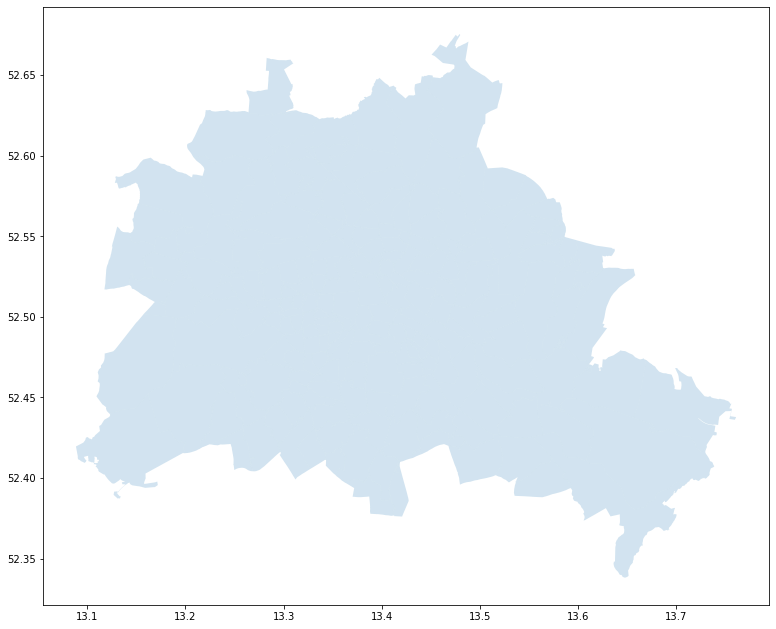

In [23]:
fig, ax = plt.subplots()

berlin_df.plot(
    ax=ax, 
    alpha=0.2
)


/Users/origenolet/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


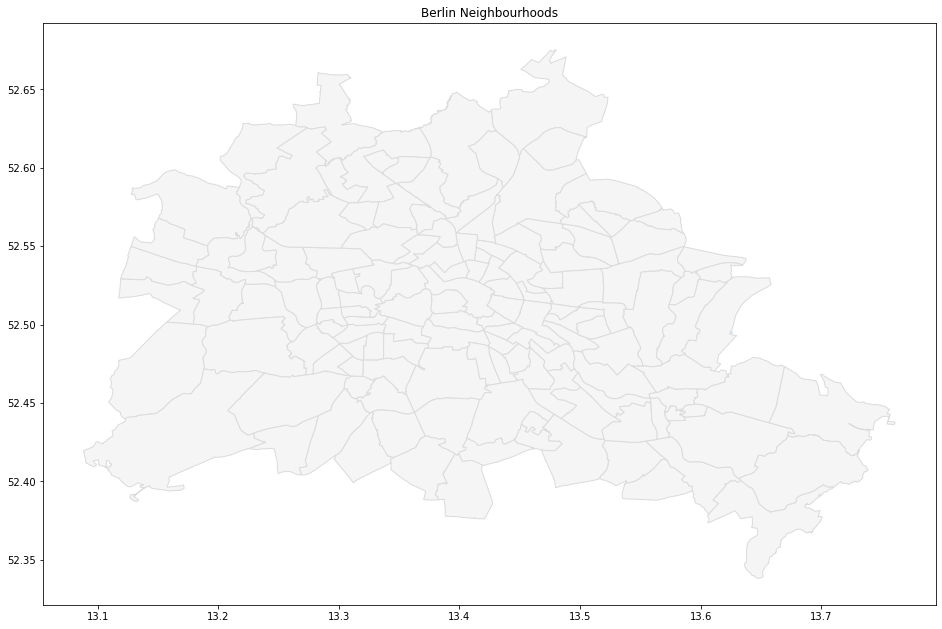

In [24]:
fig, ax = plt.subplots()

berlin_df.plot(
    ax=ax, 
    alpha=0.2
)

berlin_neighbourhoods_df.plot(
    ax=ax, 
    column='neighbourhood_group',
    categorical=True, 
    legend=True, 
    legend_kwds={'title': 'Neighbourhood', 'loc': 'upper right'},
    color='whitesmoke',
    edgecolor='gainsboro'
)

ax.set(
    title='Berlin Neighbourhoods', 
    aspect=1.3
);

In [25]:
listings = pd.read_csv('/Users/origenolet/Desktop/Ironhack/Week5/Mid-bootcamp-project/data/clean/listings_clean.csv')
display(listings.head())
listings.columns
print(listings.info())

,id,neighbourhood,district,property_type,room_type,accommodates,n_bathrooms,bedrooms,beds,price,...,kitchen,parking,balcony,bbq,washer,host_email,host_phone,host_work_email,longitude,latitude
0,39971294,nördliche Luisenstadt,Friedrichshain-Kreuzberg,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,50.0,...,1,1,0,0,1,1,1,1,13.415730,52.501680
1,17580693,Parkviertel,Mitte,Private room in condo,Private room,1,0.0,1.0,1.0,42.0,...,0,0,0,0,0,1,1,0,13.355150,52.561510
2,579471587567149993,Friedenau,Tempelhof - Schöneberg,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,52.0,...,1,0,0,0,1,1,1,0,13.336424,52.477266
3,17497917,Alexanderplatz,Mitte,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,106.0,...,1,1,1,0,1,1,1,1,13.410120,52.524380
4,9924899,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,Private room in rental unit,Private room,1,0.0,1.0,1.0,39.0,...,1,0,0,0,0,1,1,0,13.417120,52.490870


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14711 entries, 0 to 14710
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14711 non-null  int64  
 1   neighbourhood    14711 non-null  object 
 2   district         14711 non-null  object 
 3   property_type    14711 non-null  object 
 4   room_type        14711 non-null  object 
 5   accommodates     14711 non-null  int64  
 6   n_bathrooms      14711 non-null  float64
 7   bedrooms         14711 non-null  float64
 8   beds             14711 non-null  float64
 9   price            14711 non-null  float64
 10  wifi             14711 non-null  int64  
 11  kitchen          14711 non-null  int64  
 12  parking          14711 non-null  int64  
 13  balcony          14711 non-null  int64  
 14  bbq              14711 non-null  int64  
 15  washer           14711 non-null  int64  
 16  host_email       14711 non-null  int64  
 17  host_phone  

/Users/origenolet/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


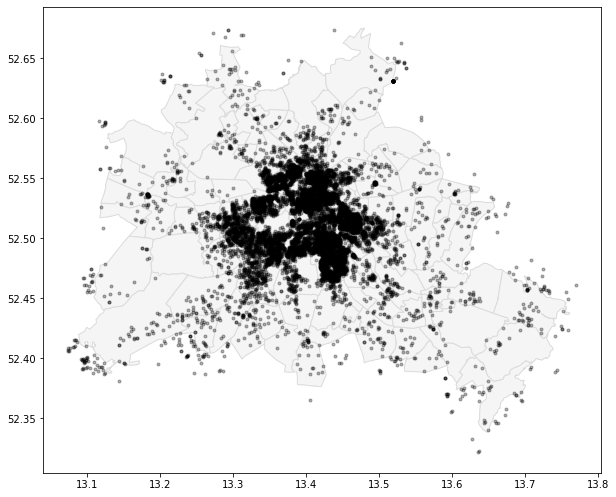

In [26]:
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
berlin_df.plot(ax=ax, alpha=0.2, color = "grey")
berlin_neighbourhoods_df.plot(
    ax=ax, 
    column='neighbourhood_group',
    categorical=True, 
    legend=True, 
    legend_kwds={'title': 'Neighbourhood', 'loc': 'upper right'},
    color='whitesmoke',
    edgecolor='gainsboro'
)
for i in range(0,len(listings["longitude"])):
    ax.plot(list(listings["longitude"])[i],list(listings["latitude"])[i], marker='.',
        c='black', 
        alpha=0.3)

plt.savefig('../images/berlin.png', bbox_inches='tight')